# Project: Brain Tumor Detection Using Deep Learning
# Author: A B M Ahsan


In [1]:
# Checking images from both folders to ensure they are identical
# Import necessary libraries
import cv2
import numpy as np
import os

# Import data
outer_path = r"G:\My Drive\Machine Learning Projects\Brain Tumor Prediction_Self Project\archive\yes"
inner_path = r"G:\My Drive\Machine Learning Projects\Brain Tumor Prediction_Self Project\archive\brain_tumor_dataset\yes"

# Image filenames to check
image_names = ["Y1.jpg", "Y2.jpg", "Y3.jpg", "Y4.jpg"]

for name in image_names:
    img1 = cv2.imread(f"{outer_path}\\{name}")
    img2 = cv2.imread(f"{inner_path}\\{name}")
    
    print(f"\nChecking image: {name}")
    
    if img1 is None:
        print("  Image 1 (outer) not found.")
        continue
    if img2 is None:
        print("  Image 2 (inner) not found.")
        continue

    # Shape check
    if img1.shape == img2.shape:
        print("  ✅ Shapes match:", img1.shape)
    else:
        print("  ❌ Shapes differ:", img1.shape, "vs", img2.shape)
    
    # Pixel-by-pixel check
    if np.array_equal(img1, img2):
        print("  ✅ Images are identical.")
    else:
        print("  ❌ Images differ.")



Checking image: Y1.jpg
  ✅ Shapes match: (218, 180, 3)
  ✅ Images are identical.

Checking image: Y2.jpg
  ✅ Shapes match: (212, 209, 3)
  ✅ Images are identical.

Checking image: Y3.jpg
  ✅ Shapes match: (519, 456, 3)
  ✅ Images are identical.

Checking image: Y4.jpg
  ✅ Shapes match: (225, 225, 3)
  ✅ Images are identical.


In [2]:
#pip show torch torchvision


In [3]:
#pip install torch torchvision torchaudio


Classes: ['no', 'yes']


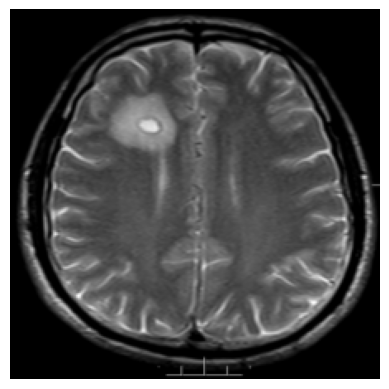

Label: yes


In [5]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Import data
data_dir = r"G:\My Drive\Machine Learning Projects\Brain Tumor Prediction_Self Project\archive\brain_tumor_dataset"

# Define transformations: resize, to tensor, normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet means
                         std=[0.229, 0.224, 0.225])
])

# Load full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Print class names
print("Classes:", full_dataset.classes)

# Function to show image
def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)  # unnormalize
    img = img.permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show some images from train
data_iter = iter(train_loader)
images, labels = next(data_iter)
imshow(images[0])
print("Label:", full_dataset.classes[labels[0]])


# Model Development CNN

Simple CNN Model

Using device: cpu


Epoch 1/10 Training: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 1/10 | Train Loss: 1.0924, Train Acc: 0.5495 | Val Loss: 0.5684, Val Acc: 0.7059


Epoch 2/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


Epoch 2/10 | Train Loss: 0.5403, Train Acc: 0.7426 | Val Loss: 0.5156, Val Acc: 0.7647


Epoch 3/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 3/10 | Train Loss: 0.4283, Train Acc: 0.8168 | Val Loss: 0.4632, Val Acc: 0.8039


Epoch 4/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 4/10 | Train Loss: 0.4032, Train Acc: 0.7970 | Val Loss: 0.4672, Val Acc: 0.8039


Epoch 5/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]


Epoch 5/10 | Train Loss: 0.3407, Train Acc: 0.8614 | Val Loss: 0.4482, Val Acc: 0.7843


Epoch 6/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 6/10 | Train Loss: 0.2873, Train Acc: 0.9059 | Val Loss: 0.4356, Val Acc: 0.8039


Epoch 7/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 7/10 | Train Loss: 0.2094, Train Acc: 0.9158 | Val Loss: 0.4816, Val Acc: 0.8039


Epoch 8/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]


Epoch 8/10 | Train Loss: 0.1429, Train Acc: 0.9505 | Val Loss: 0.6742, Val Acc: 0.7843


Epoch 9/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 9/10 | Train Loss: 0.1268, Train Acc: 0.9505 | Val Loss: 0.5670, Val Acc: 0.7843


Epoch 10/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]


Epoch 10/10 | Train Loss: 0.1018, Train Acc: 0.9703 | Val Loss: 0.5433, Val Acc: 0.8039
Training complete. Best val loss: 0.4356
Model saved as simple_cnn_brain_tumor.pth


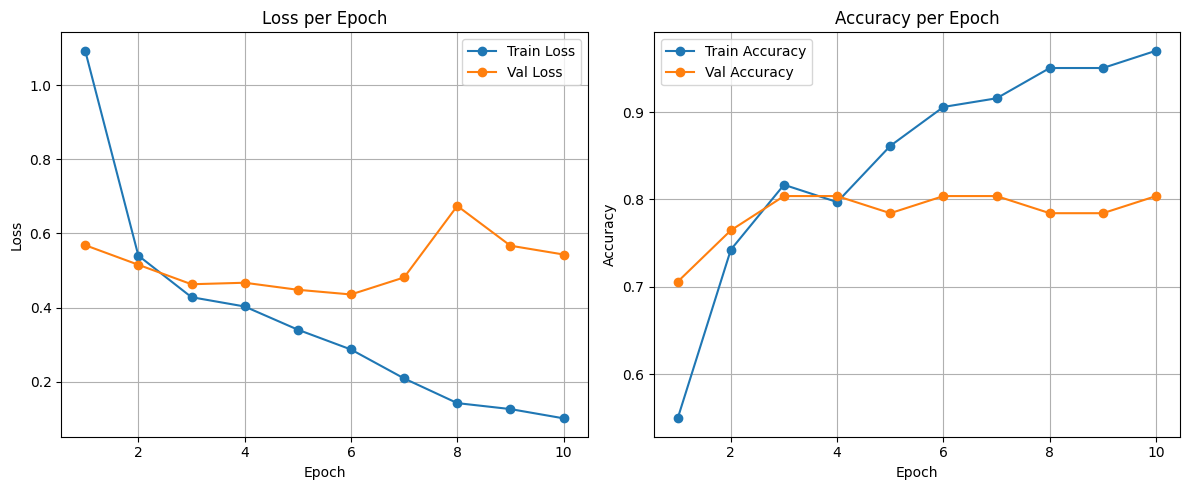

In [6]:
import torch 
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt

# Define simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # 3x224x224 -> 16x224x224
            nn.ReLU(),
            nn.MaxPool2d(2),                             # -> 16x112x112

            nn.Conv2d(16, 32, kernel_size=3, padding=1), # 32x112x112
            nn.ReLU(),
            nn.MaxPool2d(2),                             # -> 32x56x56

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # 64x56x56
            nn.ReLU(),
            nn.MaxPool2d(2),                             # -> 64x28x28
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model, loss, optimizer
model = SimpleCNN(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 10
best_val_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
    
    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

# Load best model weights
model.load_state_dict(best_model_wts)
print(f"Training complete. Best val loss: {best_val_loss:.4f}")

# Save the best model
torch.save(model.state_dict(), 'simple_cnn_brain_tumor.pth')
print("Model saved as simple_cnn_brain_tumor.pth")

# Plot loss and accuracy
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Val Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


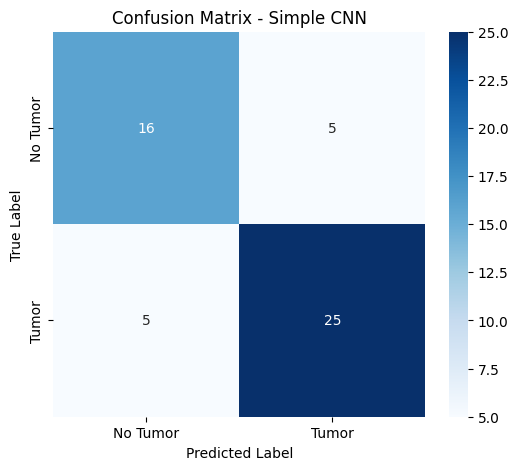

Classification Report - Simple CNN:
              precision    recall  f1-score   support

    No Tumor       0.76      0.76      0.76        21
       Tumor       0.83      0.83      0.83        30

    accuracy                           0.80        51
   macro avg       0.80      0.80      0.80        51
weighted avg       0.80      0.80      0.80        51



In [7]:
# Ensure required libraries are imported
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set model to evaluation mode
model.eval()  # This is your trained SimpleCNN model

all_preds = []
all_labels = []
all_images = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())

# Class names 
class_names = ['No Tumor', 'Tumor']

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Simple CNN')
plt.show()

# Classification Report
print("Classification Report - Simple CNN:")
print(classification_report(all_labels, all_preds, target_names=class_names))


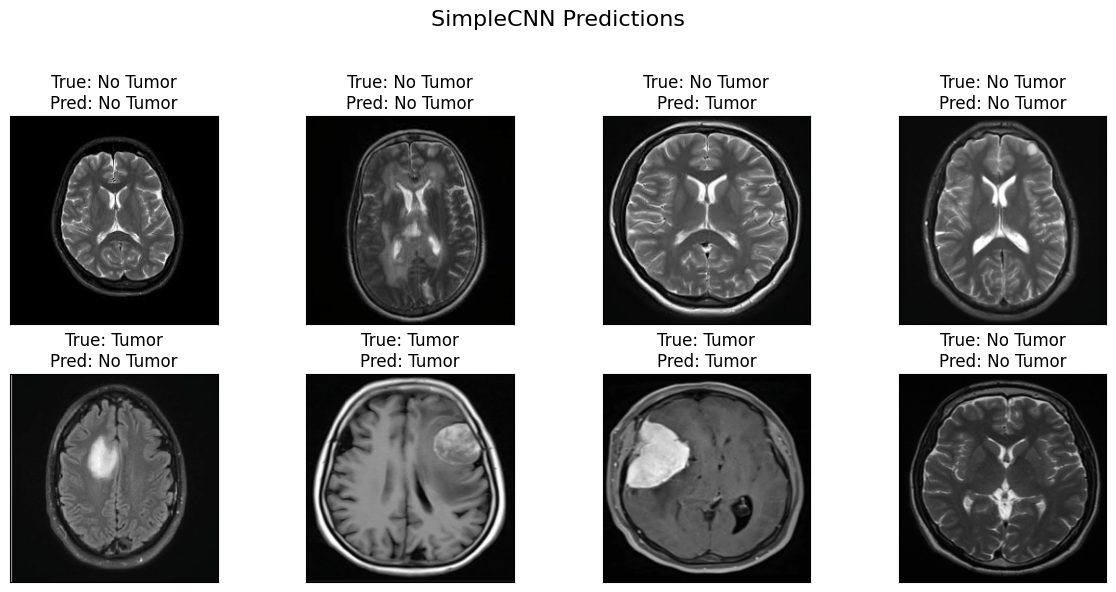

In [8]:
import matplotlib.pyplot as plt
import torch

model.eval()
images, labels = next(iter(val_loader))  # Use train_loader or test_loader similarly
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 6))
for idx in range(min(8, len(images))):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])
    img = images[idx].cpu().permute(1, 2, 0).numpy()
    
    # Undo normalization for display
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = std * img + mean
    img = img.clip(0, 1)
    
    ax.imshow(img)
    ax.set_title(f"True: {class_names[labels[idx].item()]}\nPred: {class_names[preds[idx].item()]}")
    
plt.suptitle("SimpleCNN Predictions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


Custom CNN Model

In [9]:
# Set to exactly 10 epochs
num_epochs = 10
best_model_wts = copy.deepcopy(model.state_dict())

# For plotting
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Optional: Save best weights manually (not tied to early stopping anymore)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

# Load best model weights after training
model.load_state_dict(best_model_wts)
print(f"Training complete. Best val loss: {best_val_loss:.4f}")

# Save model
torch.save(model.state_dict(), 'brain_tumor_cnn.pth')
print("Model saved as brain_tumor_cnn.pth")


Epoch 1/10 Training: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 1/10 | Train Loss: 0.1852, Train Acc: 0.9307 | Val Loss: 0.4774, Val Acc: 0.7843


Epoch 2/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 2/10 | Train Loss: 0.1449, Train Acc: 0.9406 | Val Loss: 0.4611, Val Acc: 0.8039


Epoch 3/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


Epoch 3/10 | Train Loss: 0.1034, Train Acc: 0.9703 | Val Loss: 0.5799, Val Acc: 0.8039


Epoch 4/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 4/10 | Train Loss: 0.1023, Train Acc: 0.9703 | Val Loss: 0.4694, Val Acc: 0.7843


Epoch 5/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]


Epoch 5/10 | Train Loss: 0.0618, Train Acc: 0.9901 | Val Loss: 0.6420, Val Acc: 0.8039


Epoch 6/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


Epoch 6/10 | Train Loss: 0.0442, Train Acc: 0.9851 | Val Loss: 0.6281, Val Acc: 0.7843


Epoch 7/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


Epoch 7/10 | Train Loss: 0.0284, Train Acc: 0.9950 | Val Loss: 0.7731, Val Acc: 0.8039


Epoch 8/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]


Epoch 8/10 | Train Loss: 0.0294, Train Acc: 0.9901 | Val Loss: 0.5665, Val Acc: 0.8039


Epoch 9/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


Epoch 9/10 | Train Loss: 0.0206, Train Acc: 1.0000 | Val Loss: 0.5254, Val Acc: 0.7843


Epoch 10/10 Training: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


Epoch 10/10 | Train Loss: 0.0310, Train Acc: 0.9950 | Val Loss: 0.5743, Val Acc: 0.8039
Training complete. Best val loss: 0.4356
Model saved as brain_tumor_cnn.pth


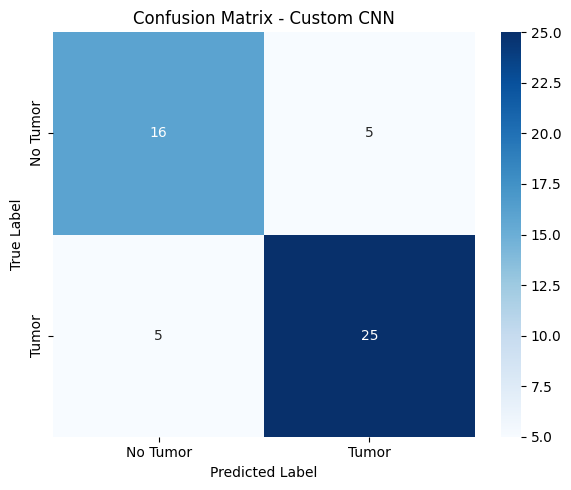

Classification Report - Custom CNN:
              precision    recall  f1-score   support

    No Tumor       0.76      0.76      0.76        21
       Tumor       0.83      0.83      0.83        30

    accuracy                           0.80        51
   macro avg       0.80      0.80      0.80        51
weighted avg       0.80      0.80      0.80        51



In [10]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure evaluation mode is set
model.eval()  

all_preds = []
all_labels = []
all_images = []

# Inference with no gradient tracking
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # custom_cnn_model(images) if a different variable
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_images.extend(images.cpu())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Custom CNN')
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - Custom CNN:")
print(classification_report(all_labels, all_preds, target_names=class_names))


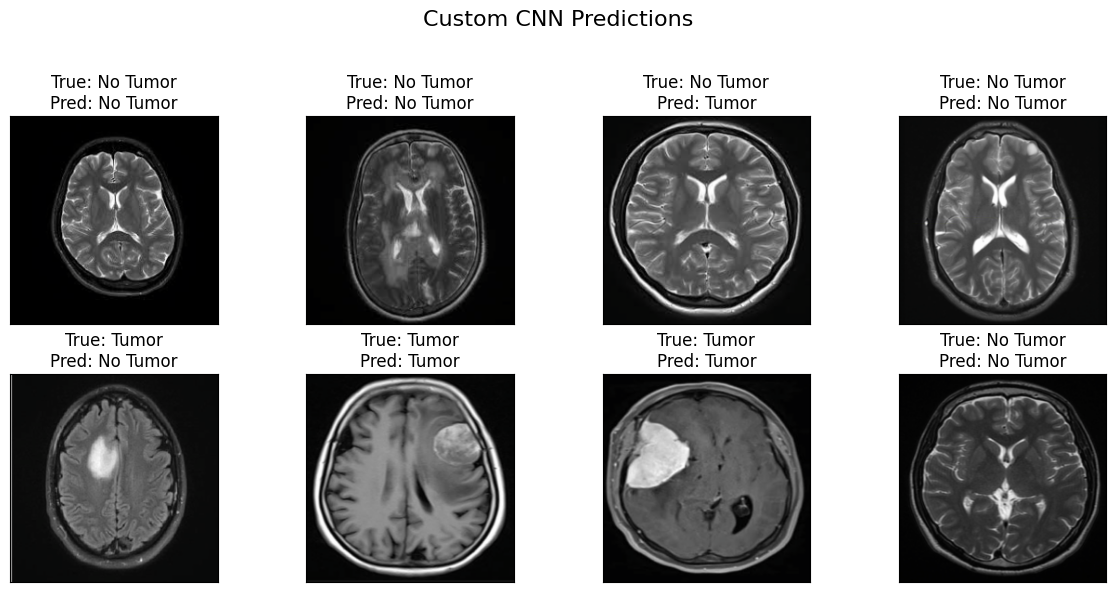

In [11]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Put the model in evaluation mode
model.eval()

# Load a batch of validation data
images, labels = next(iter(val_loader))
images, labels = images.to(device), labels.to(device)

# Forward pass to get predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Define ImageNet normalization stats (used during preprocessing)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Create a figure to display predictions
fig = plt.figure(figsize=(12, 6))
for idx in range(min(8, len(images))):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])
    
    # Unnormalize image
    img = images[idx].cpu().permute(1, 2, 0).numpy()
    img = std * img + mean
    img = np.clip(img, 0, 1)

    ax.imshow(img)
    ax.set_title(f"True: {class_names[labels[idx].item()]}\nPred: {class_names[preds[idx].item()]}")

plt.suptitle("Custom CNN Predictions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Renset18 Model

c:\Users\A B M Ahsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\A B M Ahsan\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cpu
Classes: ['no', 'yes']


Epoch 1/10 Training: 100%|██████████| 7/7 [00:14<00:00,  2.12s/it]


Epoch 1/10 | Train Loss: 0.8282, Train Acc: 0.7277 | Val Loss: 0.5697, Val Acc: 0.7451


Epoch 2/10 Training: 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]


Epoch 2/10 | Train Loss: 0.4448, Train Acc: 0.8713 | Val Loss: 0.7711, Val Acc: 0.8627


Epoch 3/10 Training: 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]


Epoch 3/10 | Train Loss: 0.3003, Train Acc: 0.8911 | Val Loss: 0.9376, Val Acc: 0.7255


Epoch 4/10 Training: 100%|██████████| 7/7 [00:11<00:00,  1.67s/it]


Epoch 4/10 | Train Loss: 0.2543, Train Acc: 0.8960 | Val Loss: 0.7091, Val Acc: 0.8824


Epoch 5/10 Training: 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]


Epoch 5/10 | Train Loss: 0.1284, Train Acc: 0.9653 | Val Loss: 0.4220, Val Acc: 0.8431


Epoch 6/10 Training: 100%|██████████| 7/7 [00:11<00:00,  1.68s/it]


Epoch 6/10 | Train Loss: 0.0739, Train Acc: 0.9703 | Val Loss: 0.5270, Val Acc: 0.9216


Epoch 7/10 Training: 100%|██████████| 7/7 [00:11<00:00,  1.68s/it]


Epoch 7/10 | Train Loss: 0.0949, Train Acc: 0.9703 | Val Loss: 0.4136, Val Acc: 0.9412


Epoch 8/10 Training: 100%|██████████| 7/7 [00:13<00:00,  1.89s/it]


Epoch 8/10 | Train Loss: 0.0800, Train Acc: 0.9802 | Val Loss: 0.2019, Val Acc: 0.9020


Epoch 9/10 Training: 100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


Epoch 9/10 | Train Loss: 0.0867, Train Acc: 0.9604 | Val Loss: 0.2421, Val Acc: 0.9216


Epoch 10/10 Training: 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]


Epoch 10/10 | Train Loss: 0.1753, Train Acc: 0.9604 | Val Loss: 0.8857, Val Acc: 0.6471
Training complete. Best val loss: 0.2019
Model saved as resnet18_brain_tumor.pth


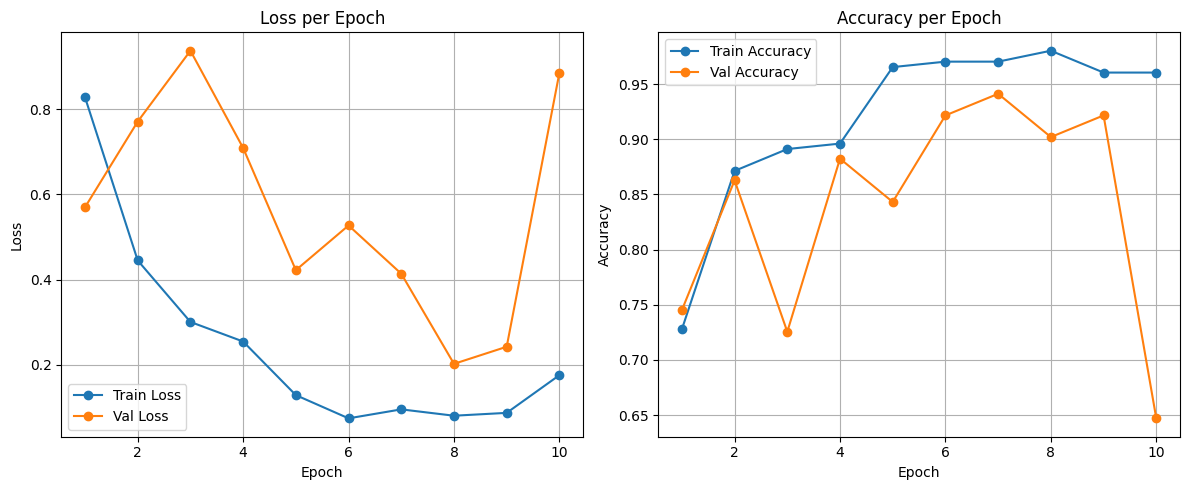

In [13]:
# Evaluate ResNet18 model for brain tumor classification with 10 fixed epochs
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Paths
data_dir = r"G:\My Drive\Machine Learning Projects\Brain Tumor Prediction_Self Project\archive\brain_tumor_dataset"

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = full_dataset.classes
print("Classes:", class_names)

# Split into train and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Load and modify ResNet18
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # binary classification

model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training settings
num_epochs = 10
best_val_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())

# Lists to store loss and accuracy
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop for 10 epochs
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

# Load best model weights
model.load_state_dict(best_model_wts)
print(f"Training complete. Best val loss: {best_val_loss:.4f}")

# Save model
torch.save(model.state_dict(), 'resnet18_brain_tumor.pth')
print("Model saved as resnet18_brain_tumor.pth")

# Plot loss and accuracy
epochs_range = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Val Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


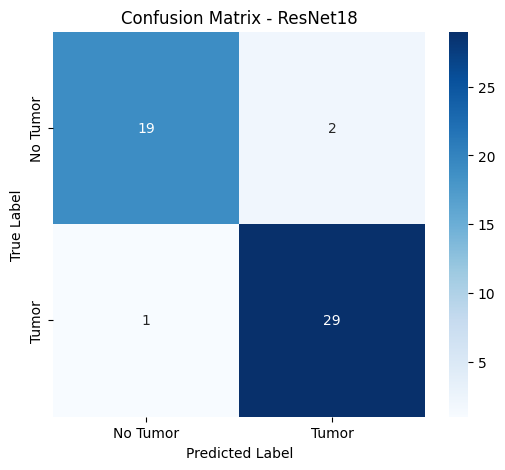

Classification Report - ResNet18:
              precision    recall  f1-score   support

    No Tumor       0.95      0.90      0.93        21
       Tumor       0.94      0.97      0.95        30

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Class names
class_names = ['No Tumor', 'Tumor']

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ResNet18')
plt.show()

# Classification Report
print("Classification Report - ResNet18:")
print(classification_report(all_labels, all_preds, target_names=class_names))


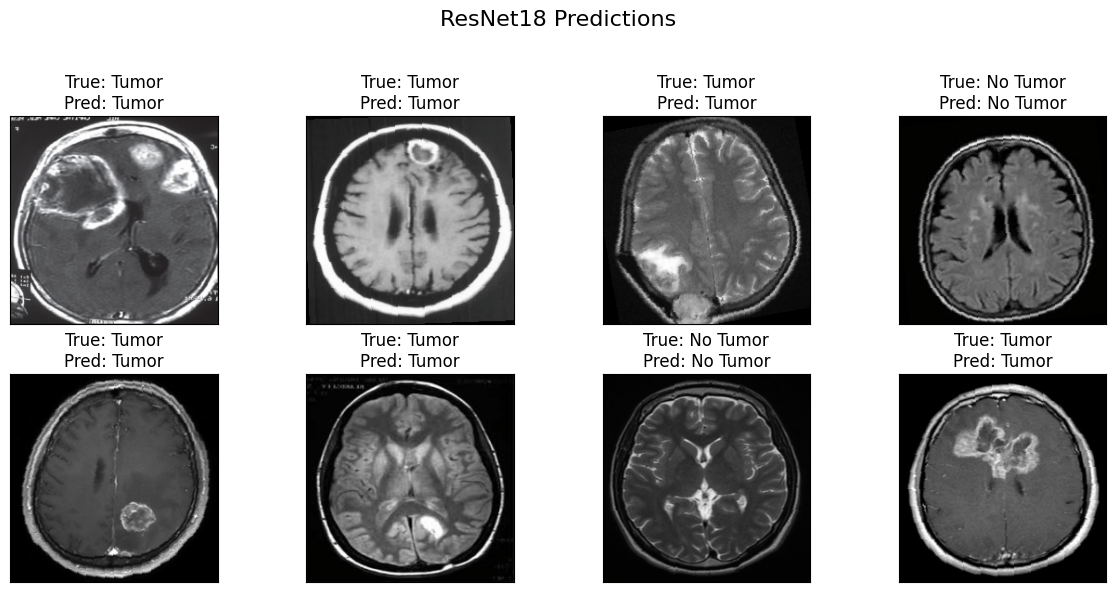

In [15]:
import matplotlib.pyplot as plt
import torch

model.eval()
images, labels = next(iter(val_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 6))
for idx in range(min(8, len(images))):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])
    img = images[idx].cpu().permute(1, 2, 0).numpy()
    
    # Undo normalization for display
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = std * img + mean
    img = img.clip(0, 1)
    
    ax.imshow(img)
    ax.set_title(f"True: {class_names[labels[idx].item()]}\nPred: {class_names[preds[idx].item()]}")
    
plt.suptitle("ResNet18 Predictions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

MobileNetV2 Model

Using device: cpu
Classes: ['no', 'yes']


Epoch 1/10: 100%|██████████| 7/7 [00:21<00:00,  3.12s/it]


Epoch 1/10 | Train Loss: 0.6646, Train Acc: 0.6782 | Val Loss: 0.8382, Val Acc: 0.7843


Epoch 2/10: 100%|██████████| 7/7 [00:17<00:00,  2.51s/it]


Epoch 2/10 | Train Loss: 0.3408, Train Acc: 0.8861 | Val Loss: 1.1155, Val Acc: 0.8235


Epoch 3/10: 100%|██████████| 7/7 [00:17<00:00,  2.45s/it]


Epoch 3/10 | Train Loss: 0.1845, Train Acc: 0.9059 | Val Loss: 1.0607, Val Acc: 0.8627


Epoch 4/10: 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


Epoch 4/10 | Train Loss: 0.2328, Train Acc: 0.9109 | Val Loss: 0.5585, Val Acc: 0.9216


Epoch 5/10: 100%|██████████| 7/7 [00:17<00:00,  2.43s/it]


Epoch 5/10 | Train Loss: 0.2126, Train Acc: 0.9109 | Val Loss: 0.7003, Val Acc: 0.9020


Epoch 6/10: 100%|██████████| 7/7 [00:17<00:00,  2.49s/it]


Epoch 6/10 | Train Loss: 0.1203, Train Acc: 0.9554 | Val Loss: 0.8899, Val Acc: 0.8235


Epoch 7/10: 100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


Epoch 7/10 | Train Loss: 0.0545, Train Acc: 0.9901 | Val Loss: 0.6011, Val Acc: 0.9020


Epoch 8/10: 100%|██████████| 7/7 [00:16<00:00,  2.43s/it]


Epoch 8/10 | Train Loss: 0.0737, Train Acc: 0.9851 | Val Loss: 0.6399, Val Acc: 0.9020


Epoch 9/10: 100%|██████████| 7/7 [00:16<00:00,  2.40s/it]


Epoch 9/10 | Train Loss: 0.0359, Train Acc: 0.9950 | Val Loss: 0.4826, Val Acc: 0.9020


Epoch 10/10: 100%|██████████| 7/7 [00:16<00:00,  2.43s/it]


Epoch 10/10 | Train Loss: 0.0978, Train Acc: 0.9653 | Val Loss: 0.5091, Val Acc: 0.9412
Training complete. Best val loss: 0.4826
Model saved as mobilenetv2_brain_tumor.pth


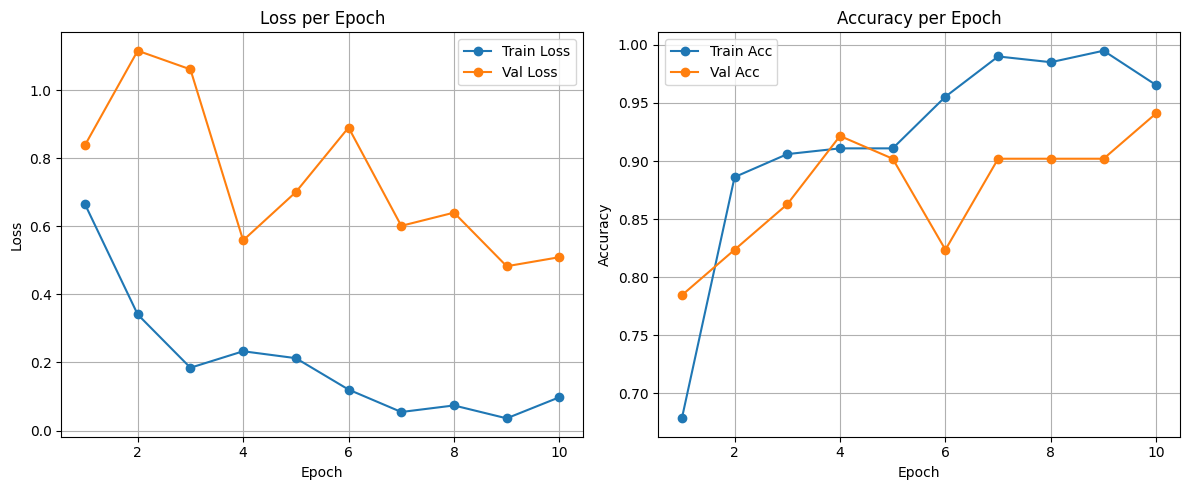

In [16]:
# Train MobileNetV2 for Brain Tumor MRI Dataset (10 Fixed Epochs)
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset path
data_dir = r"G:\My Drive\Machine Learning Projects\Brain Tumor Prediction_Self Project\archive\brain_tumor_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
class_names = full_dataset.classes
print("Classes:", class_names)

# Split dataset
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Load MobileNetV2 with pretrained weights and modify classifier
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
weights = MobileNet_V2_Weights.IMAGENET1K_V1
model = mobilenet_v2(weights=weights)
model.classifier[1] = nn.Linear(model.last_channel, len(class_names))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Fixed epoch training (no early stopping)
num_epochs = 10
best_val_loss = float('inf')
best_model_wts = copy.deepcopy(model.state_dict())

# Track metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss /= total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= total
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

# Load best weights
model.load_state_dict(best_model_wts)
print("Training complete. Best val loss: {:.4f}".format(best_val_loss))

# Save model
torch.save(model.state_dict(), 'mobilenetv2_brain_tumor.pth')
print("Model saved as mobilenetv2_brain_tumor.pth")

# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(epochs, val_accuracies, label='Val Acc', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


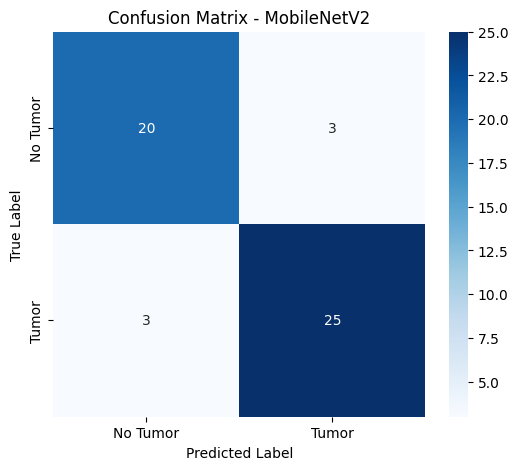

Classification Report - MobileNetV2:
              precision    recall  f1-score   support

    No Tumor       0.87      0.87      0.87        23
       Tumor       0.89      0.89      0.89        28

    accuracy                           0.88        51
   macro avg       0.88      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Evaluation on validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Class names
class_names = ['No Tumor', 'Tumor']

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MobileNetV2')
plt.show()

# Classification Report
print("Classification Report - MobileNetV2:")
print(classification_report(all_labels, all_preds, target_names=class_names))


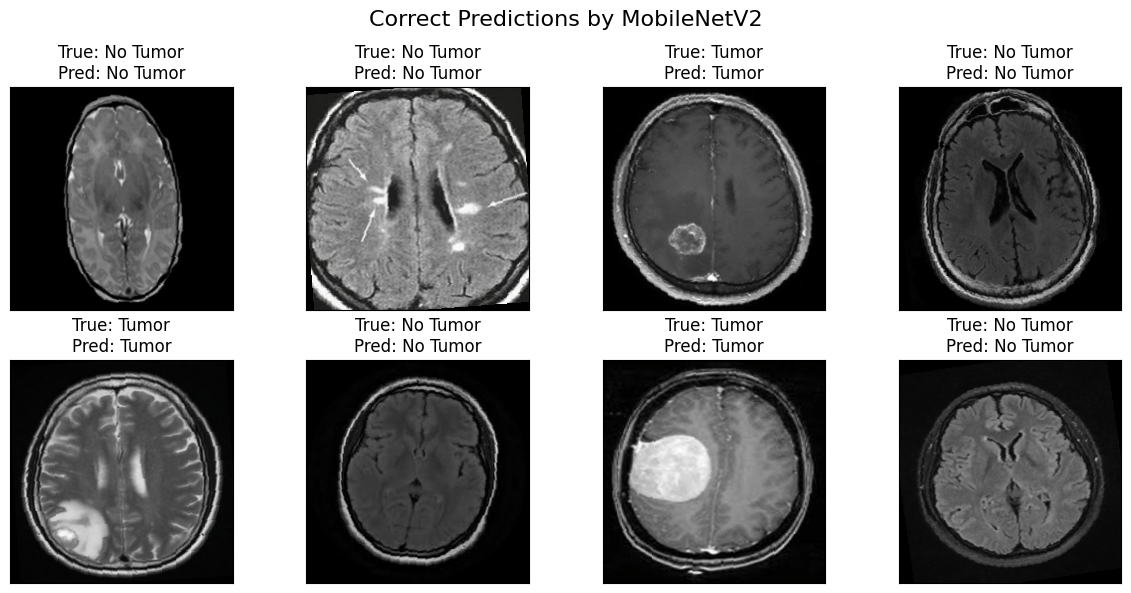

In [18]:
import matplotlib.pyplot as plt
import torch

# Set model to evaluation mode
model.eval()

# Get a batch of validation data
images, labels = next(iter(val_loader))
images, labels = images.to(device), labels.to(device)

# Forward pass (no gradient)
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Find correctly predicted indices
correct_indices = [i for i in range(len(preds)) if preds[i] == labels[i]]
correct_indices = correct_indices[:8]  # Select up to 8 correct ones

# Plot
fig = plt.figure(figsize=(12, 6))
for idx, correct_idx in enumerate(correct_indices):
    ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])

    img = images[correct_idx].cpu().permute(1, 2, 0).numpy()

    # Undo normalization (MobileNetV2 default)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = std * img + mean
    img = img.clip(0, 1)

    ax.imshow(img)
    ax.set_title(f"True: {class_names[labels[correct_idx].item()]}\nPred: {class_names[preds[correct_idx].item()]}")

plt.suptitle("Correct Predictions by MobileNetV2", fontsize=16)
plt.tight_layout()
plt.show()
